In [62]:
import numpy as np
import sys, getopt
import pandas as pd
from scipy import stats, integrate
from scipy.interpolate import interp1d
import seaborn as sns
from scipy.spatial import distance
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


In [63]:
dataset = 'cifar10'
networks = 'resnets'
path_accuracy = dataset + '_' + networks + '_accuracy.xlsx'
path_energy = dataset + '_' + networks + '_energy.xlsx'
path_compression = dataset + '_' + networks + '_compressions.xlsx'

teacher = 'ResNet-50'

df_accuracy = pd.read_excel(path_accuracy)
df_energy = pd.read_excel(path_energy)
df_compression = pd.read_excel(path_compression)

In [64]:
my_students = df_accuracy.Network.unique()
df_energy = df_energy[df_energy['Network'].isin(my_students)]

my_students = my_students[:-1] # removing last entry (teacher)

teacher_energy = df_energy.loc[df_energy.Network==teacher, 'Energy'].values[0]
teacher_accuracy = df_accuracy.loc[df_accuracy.Network==teacher, 'Scratch'].values[0]
teacher_compression = df_compression.loc[df_compression.Network==teacher, 'Compression'].values[0]

students_energy = df_energy[df_energy['Network'].isin(my_students)]
students_accuracy = df_accuracy[df_accuracy['Network'].isin(my_students)]
students_compression = df_compression[df_compression['Network'].isin(my_students)]

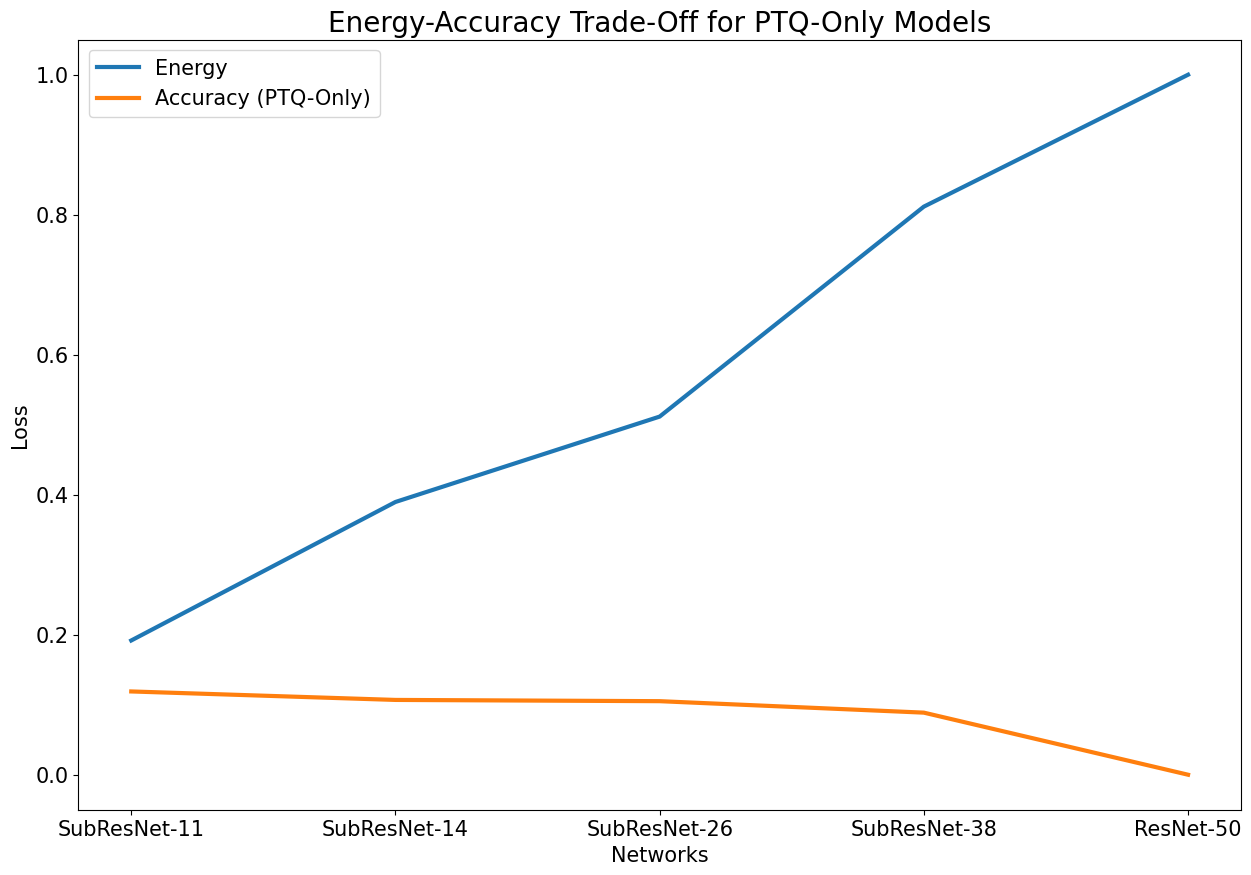

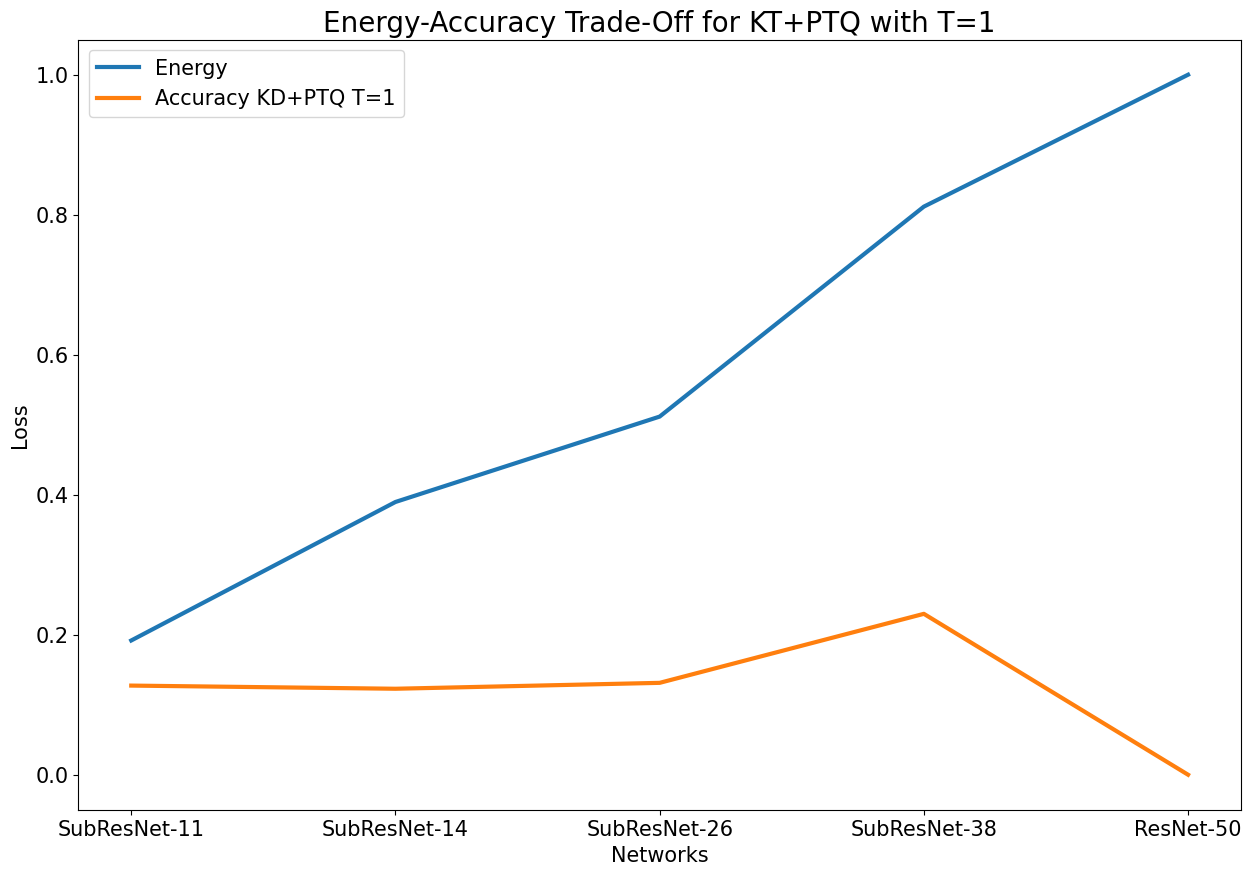

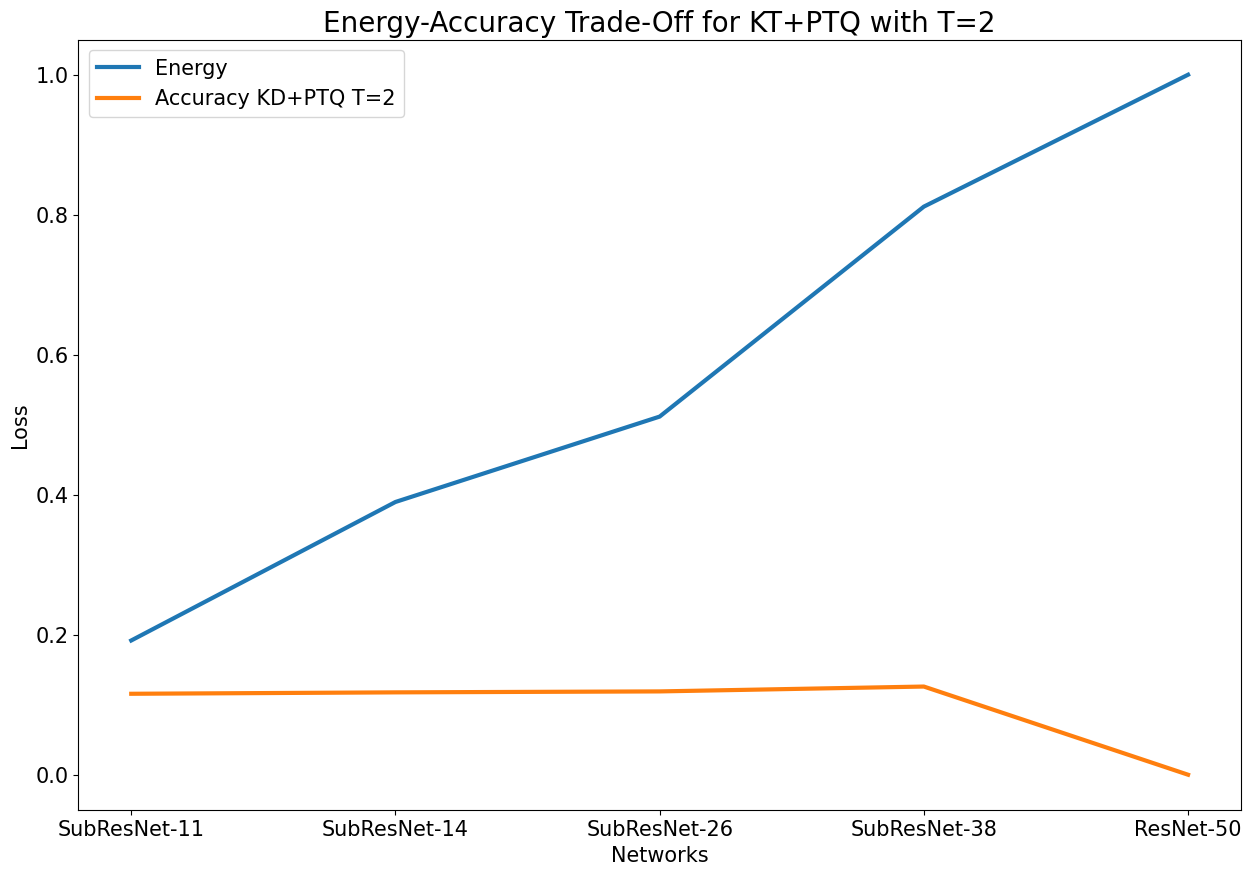

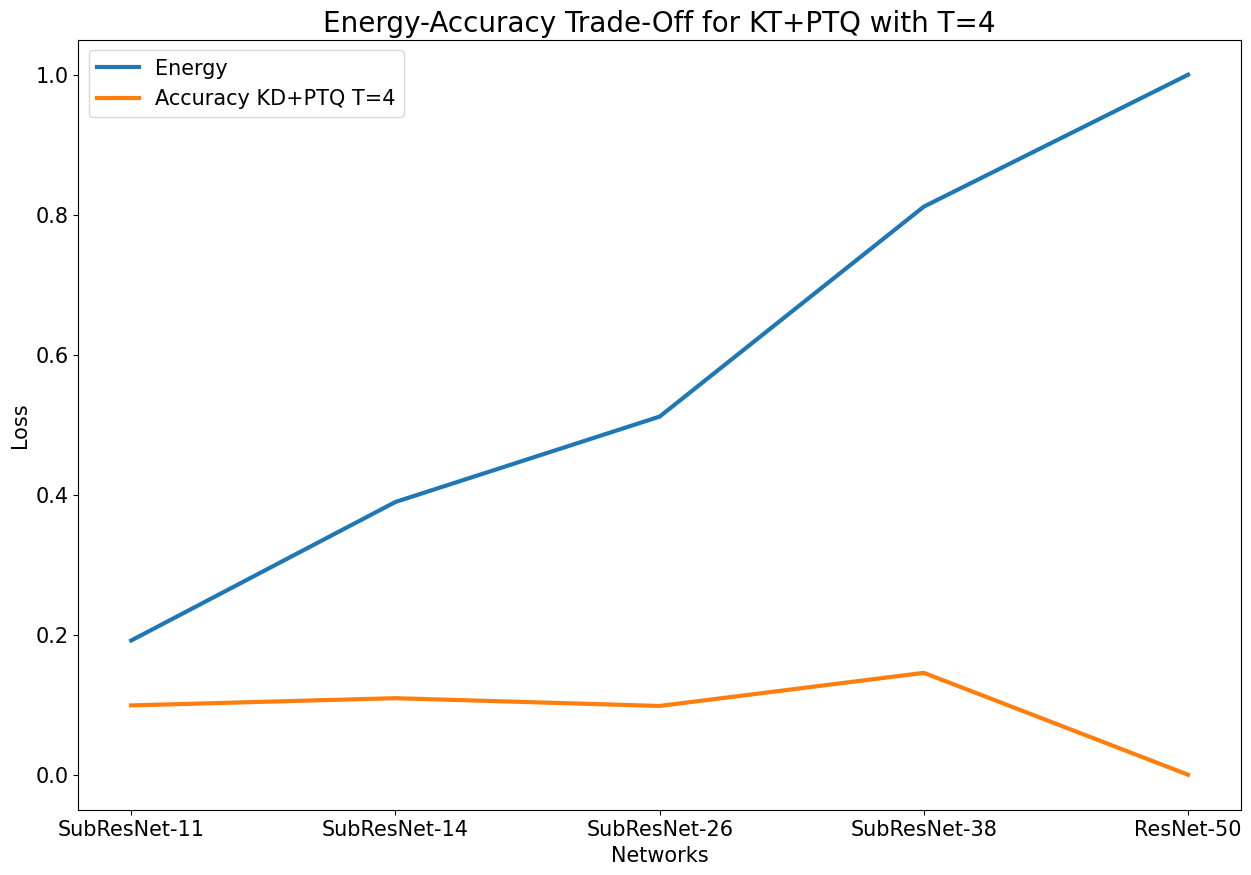

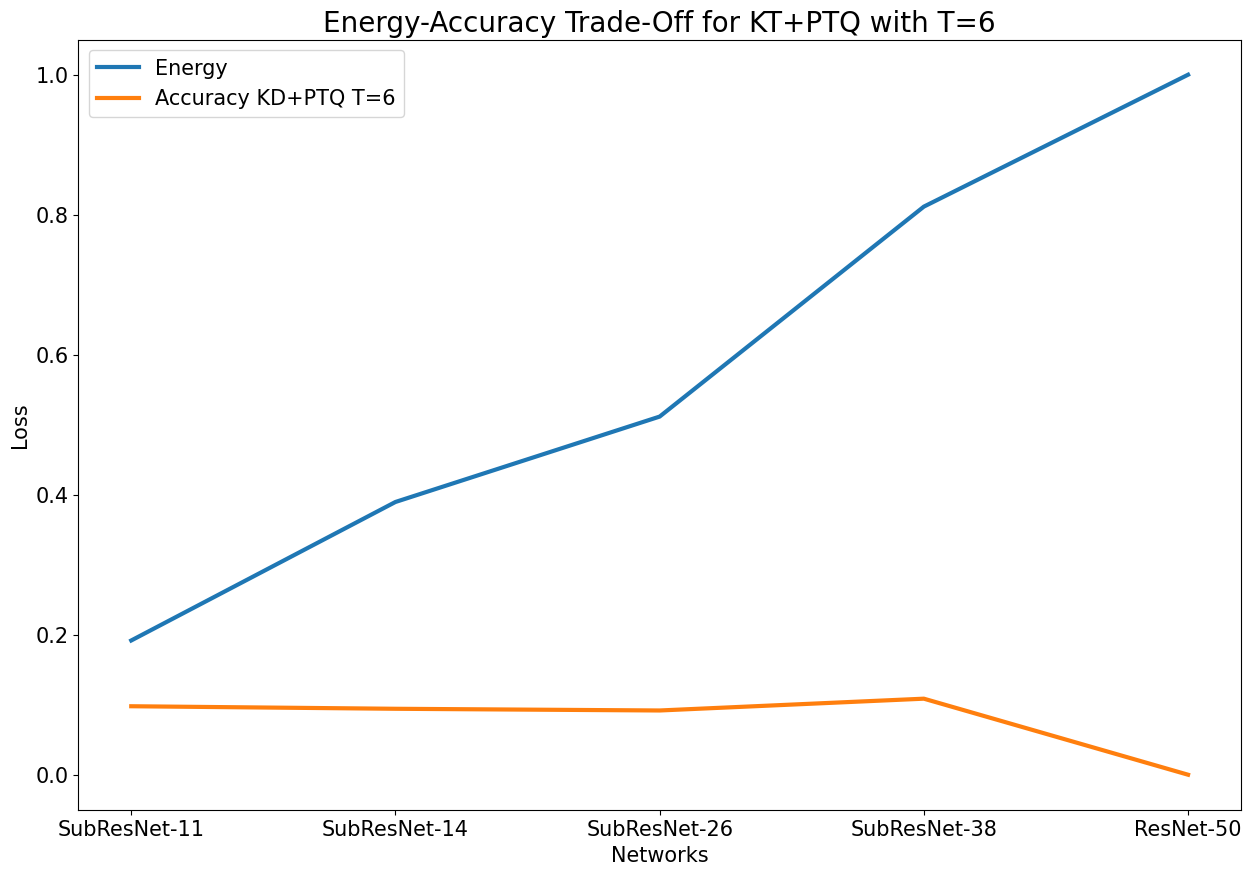

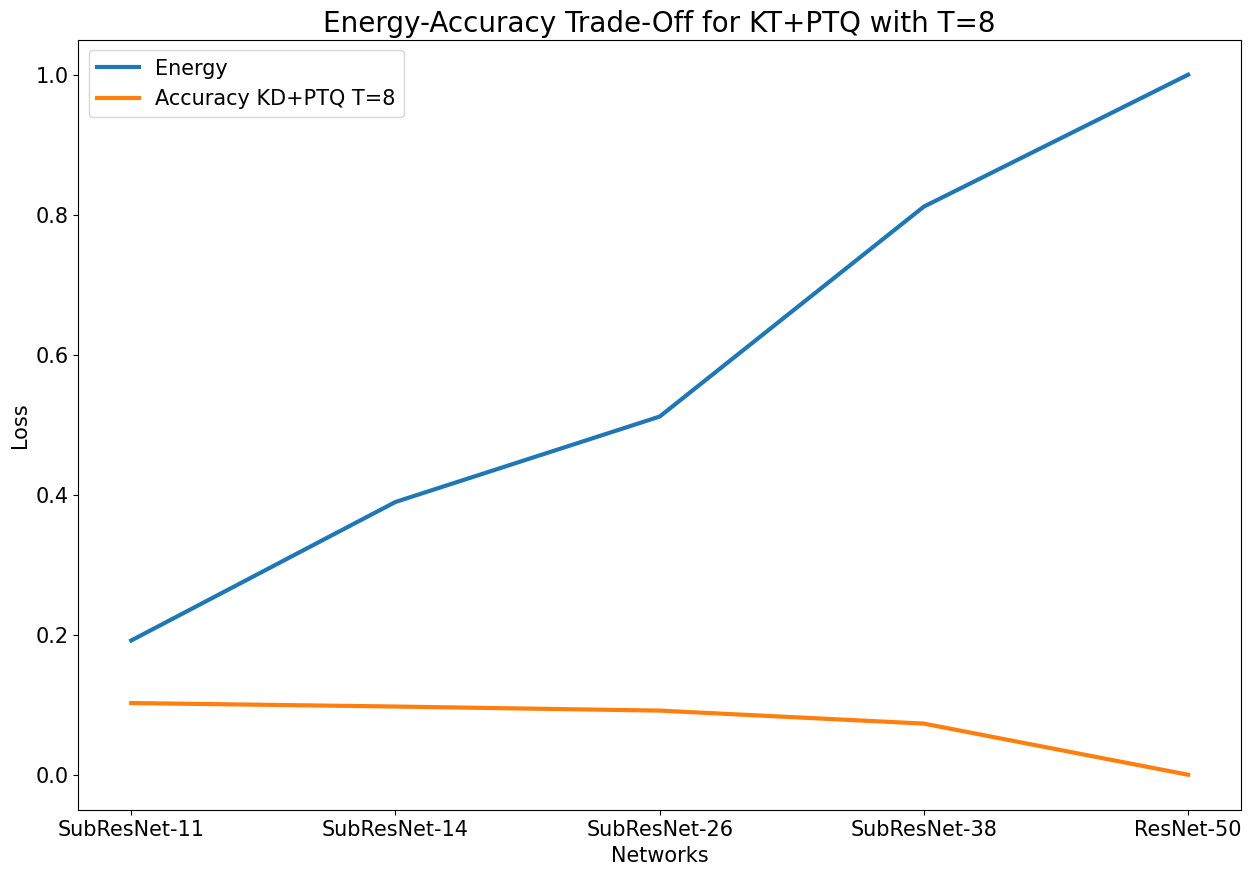

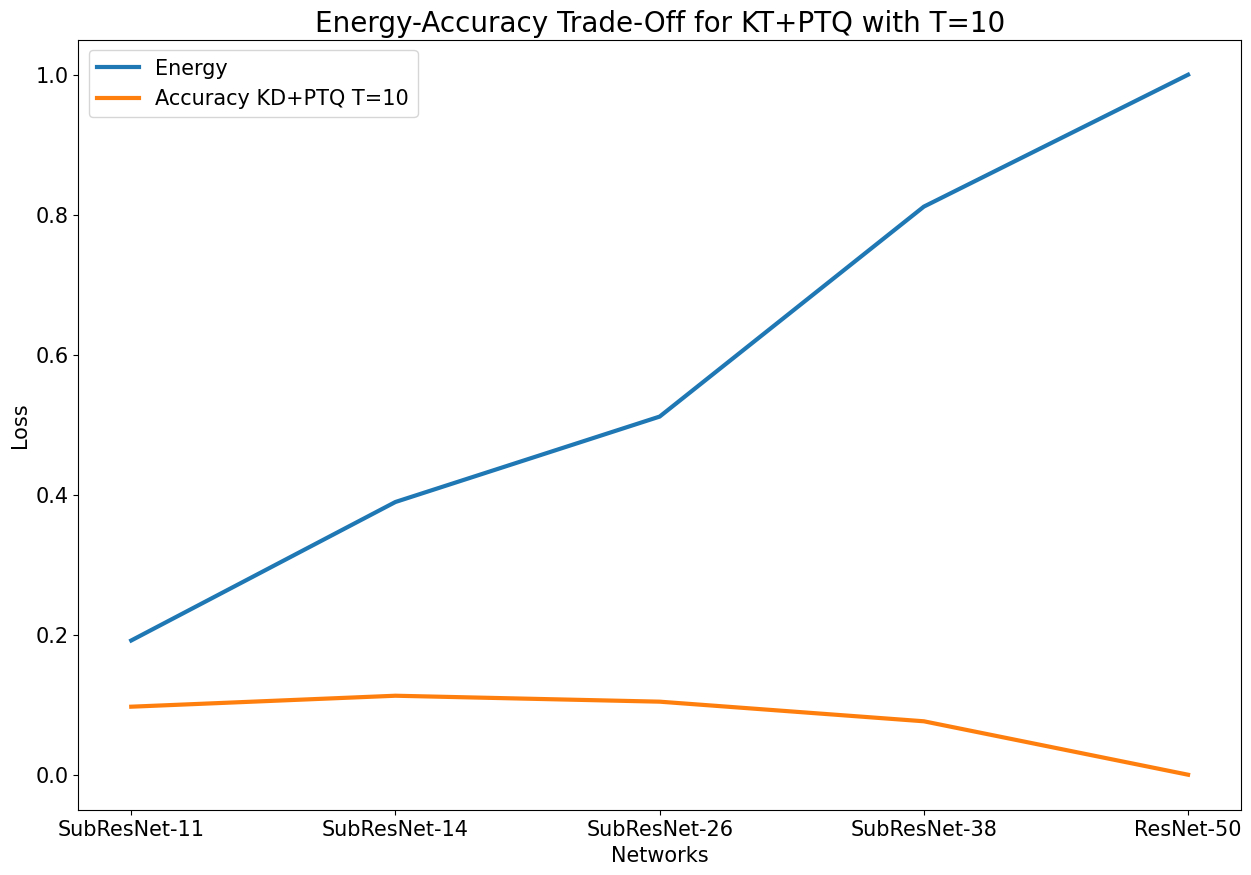

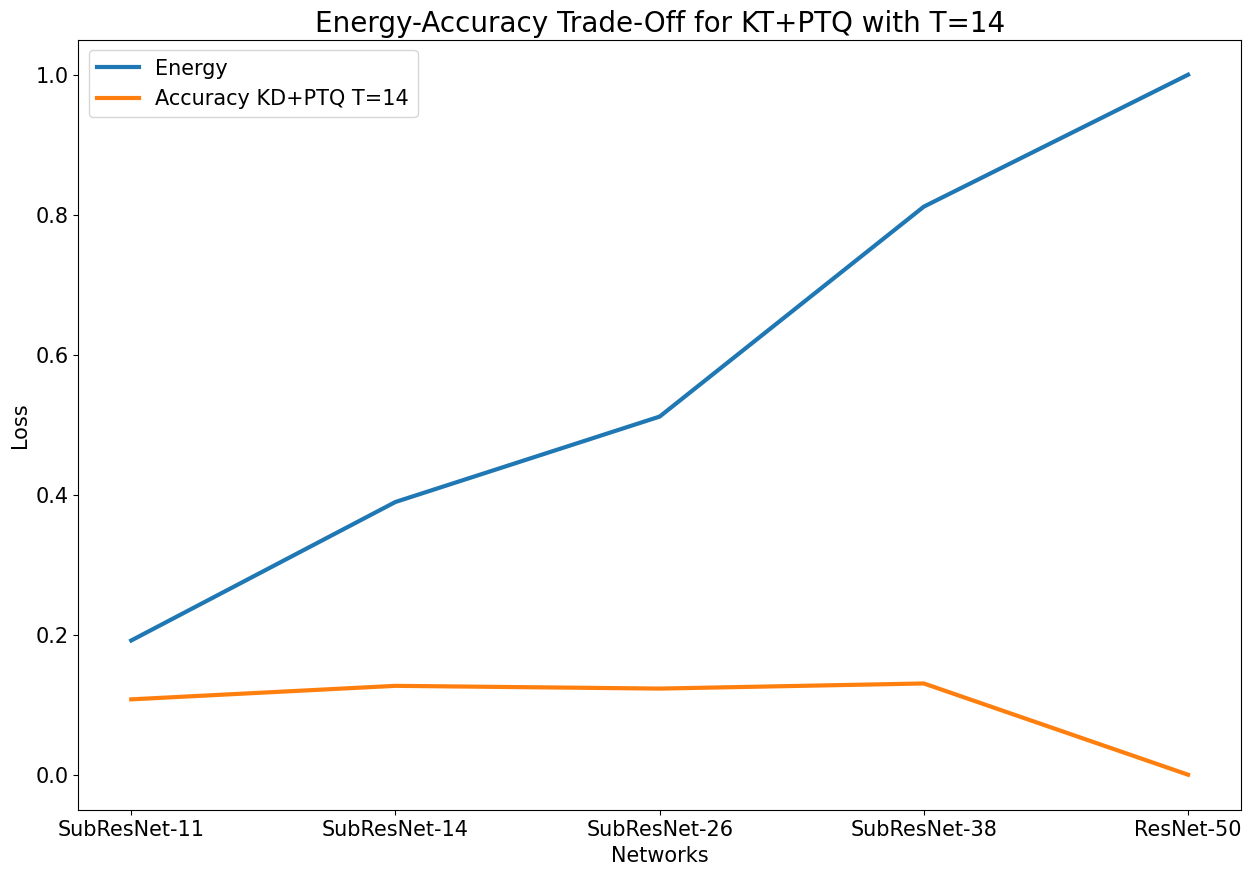

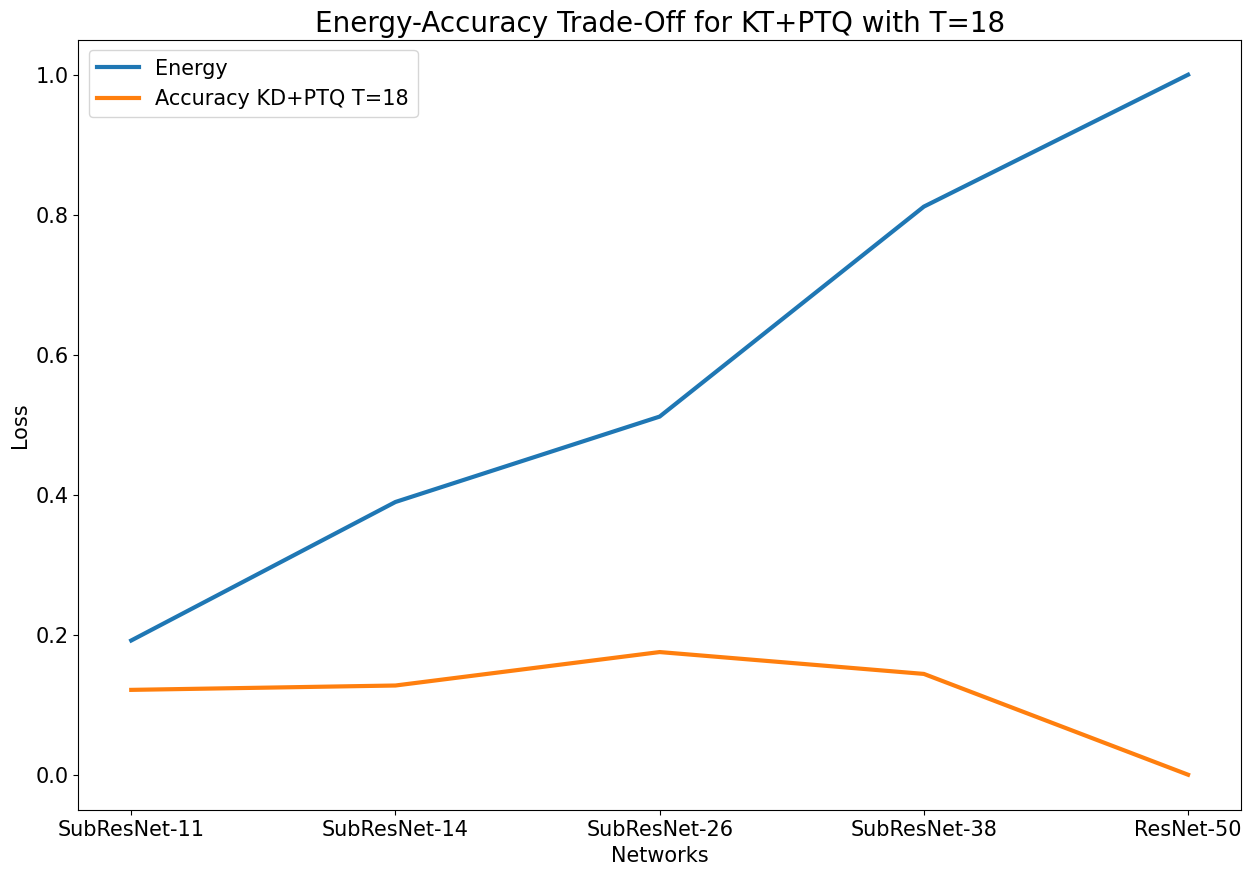

In [65]:
decrementi = df_accuracy.copy()
decrementi_energy = df_energy.copy()
#decrementi_energy.Energy = 1 - (teacher_energy - df_energy.Energy)/teacher_energy 
decrementi_energy.Energy = df_energy.Energy/teacher_energy 
#scaler1 = MinMaxScaler()
#decrementi_energy.Energy = scaler1.fit_transform(decrementi_energy.Energy.values.reshape(-1,1))

for c in df_accuracy.columns[1:]:
    #decrementi[c] = (teacher_accuracy - df_accuracy[c])/teacher_accuracy
    decrementi[c] = (1 - df_accuracy[c]/teacher_accuracy)
    #plt.yscale('log')

#scaler2 = MinMaxScaler()
#decrementi.iloc[:,1:] = scaler2.fit_transform(decrementi.iloc[:,1:].values)

for c in df_accuracy.columns[1:2]: #ptq-only models
    #decrementi[c] = (teacher_accuracy - df_accuracy[c])#/teacher_accuracy
    #decrementi[c] = (1 - df_accuracy[c]/teacher_accuracy)
    #decrementi[c] = df_accuracy[c]
    plt.figure(figsize=(15,10))
    plt.plot(decrementi['Network'],decrementi_energy['Energy'][:],linewidth=3,label='Energy')
    plt.plot(decrementi['Network'],decrementi[c],linewidth=3,label='Accuracy (PTQ-Only)')
    plt.legend(fontsize=15)
    plt.xlabel('Networks',fontsize=15)
    plt.ylabel('Loss',fontsize=15)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.title('Energy-Accuracy Trade-Off for PTQ-Only Models',fontsize=20)
    figname = 'figures/' + dataset + '_' + networks + '_tradeoff_ptqonly.png'
    plt.savefig(figname,dpi=400)
    

for c in df_accuracy.columns[2:]:
    #decrementi[c] = (teacher_accuracy - df_accuracy[c])#/teacher_accuracy
    #decrementi[c] = (1 - df_accuracy[c]/teacher_accuracy)
    #decrementi[c] = df_accuracy[c]
    plt.figure(figsize=(15,10))
    plt.plot(decrementi['Network'],decrementi_energy['Energy'][:],linewidth=3,label='Energy')
    plt.plot(decrementi['Network'],decrementi[c],linewidth=3,label='Accuracy KD+PTQ ' + c)
    plt.legend(fontsize=15)
    plt.xlabel('Networks',fontsize=15)
    plt.ylabel('Loss',fontsize=15)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.title('Energy-Accuracy Trade-Off for KT+PTQ with ' + c,fontsize=20)
    temperature =c.rsplit('=', 1)
    figname = 'figures/' + dataset + '_' + networks + '_tradeoff_kdptq_T' + temperature[1] + '.png'
    plt.savefig(figname,dpi=400)
    
    #plt.yscale('log')    


In [66]:
best_accuracy = pd.DataFrame()
best_accuracy['Network'] = df_accuracy['Network']
best_accs = []

for n in df_accuracy.Network.unique():
    temp = df_accuracy[df_accuracy['Network'] == n]
    best = temp.iloc[:,2:].values.flatten()
    best = max(best)
    best_accs.append(best)
best_accuracy['Accuracy']=best_accs


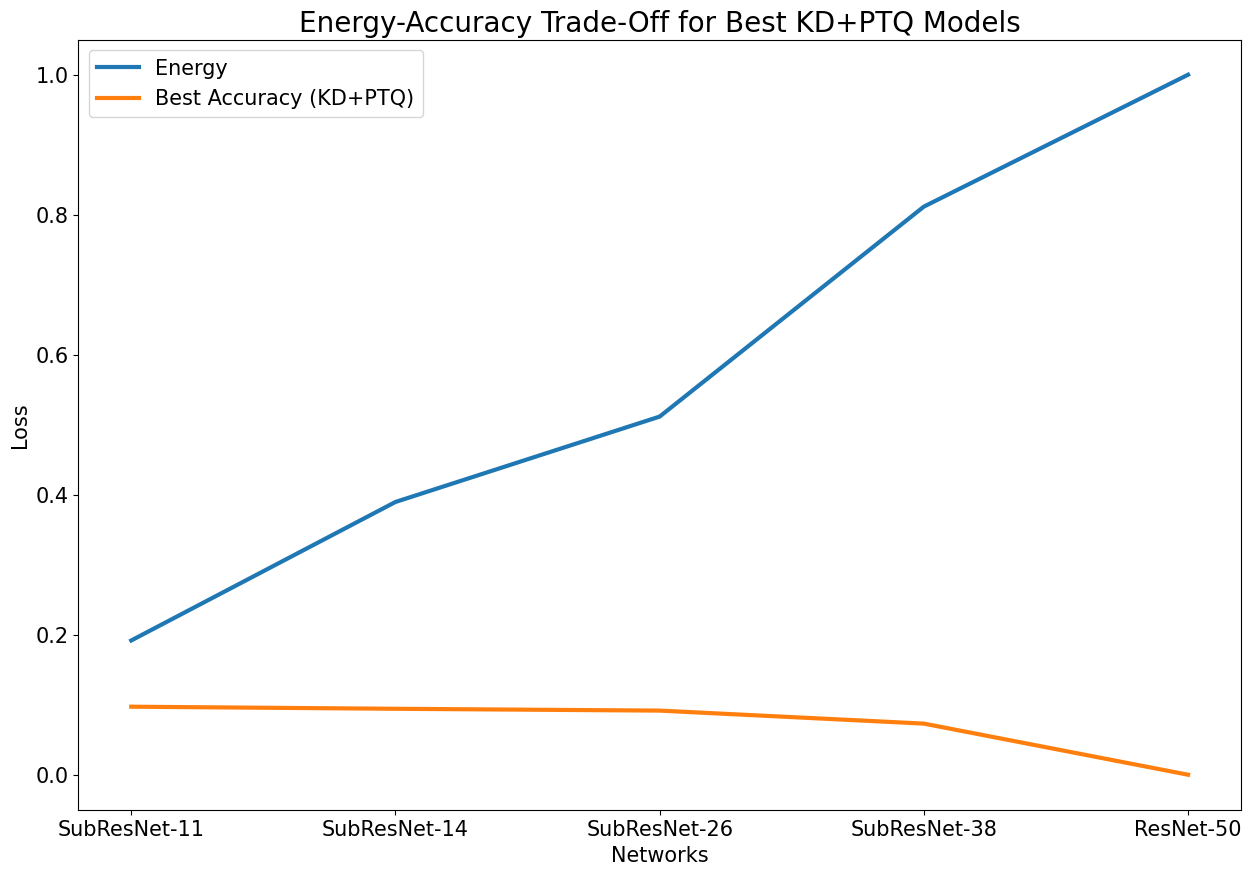

In [67]:
decrementi_best = best_accuracy.copy()

decrementi_best['Accuracy']= 1 - (best_accs/teacher_accuracy)

plt.figure(figsize=(15,10))
plt.plot(decrementi['Network'],decrementi_energy['Energy'][:],linewidth=3,label='Energy')
plt.plot(decrementi['Network'],decrementi_best['Accuracy'],linewidth=3,label='Best Accuracy (KD+PTQ)')
plt.legend(fontsize=15)
plt.xlabel('Networks',fontsize=15)
plt.ylabel('Loss',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Energy-Accuracy Trade-Off for Best KD+PTQ Models',fontsize=20)
figname = 'figures/' + dataset + '_' + networks + '_tradeoff_kdptq_best.png'
plt.savefig(figname,dpi=400)
